<a href="https://colab.research.google.com/github/jin573/studyDeepLearning/blob/main/doit8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#합성곱
#이미지 분류에 뛰어나다

**합성곱 연산**

입력 데이터 배열의 원소와 가중치 배열의 역순 원소를 곱하여 더한다.

그 다음 가중치 배열을 한 칸 움직여 곱하여 더한다. (슬라이딩)

-> 이를 반복

ex) x[0]*w[3] + x[1]*w[2] + x[2]*w[1] + x[3]*w[0]

-> x[1]*w[3] + x[2]*w[2] + x[3]*w[1] + x[4]*w[0]

-> x[2]*w[3] + x[3]*w[2] + x[4]*w[1] + x[5]*w[0]


In [3]:
#많이 사용하는 것은 <교차 상관 연산>
#합성곱 연산과 다른 점은 가중치 배열을 역순하지 않음

#가중치는 우리가 랜덤하게 초기화함! 따라서 역순하지 않아도 됨
#특징
#1. 가중치의 개수가 입력 데이터 개수보다 작다 (<-> 완전 연결 신경망)
#2. 가중치가 변하지 않는다. (모든 원소들과 계산이 끝난 후 업데이트)

In [4]:
#밸리드 패딩
#입력 데이터 배열의 시작 부터 끝에 패딩이 없다

#패딩이란? 데이터의 시작과 끝에 0을 붙이는 것

#따라서 첫 번째 원소는 연산에 1번 참여 (원소마다 계산에 참여하는 횟수가 다르다)
#이를 보완하기 위해 앞 뒤에 패딩을 붙인다
#-> 모두 있으면 풀 패딩, 입력 데이터 개수만큼 출력값이 나오게끔 개수를 조장하는 세임 패딩

In [5]:
#슬라이드의 양을 스트라이트라고 한다
#스트라이드=2이면 두 칸씩 슬라이드

In [6]:
#2차원 배열의 합성곱
#x가 [3][3] w가 [2][2]일때 스트라이트가 1이라면
#왼쪽 위부터 오른쪽 위로 이동. 그 다음 왼쪽 아래에서 오른쪽 아래로 이동 -> 2x2 크기
#2차원 배열의 세임 패딩
#3x3으로 만들고 싶을때 세임 패딩 사용

In [7]:
#보통 이미지 데이터는 3차원 (높이 * 너비 * rgb값)
#신경망 데이터는 배치 데이터를 사용하므로 (배치 차원 * 높이 * 너비 *rgb값)
#여기서 배치 데이터란? 미니 배치 할때의 배치! 한 번에 학습할 데이터의 개수

#가중치도 동일하게 3차원이 된다
#따라서 각 채널끼리 계산한다고 보면 됨.
#결과는 2차원 평면으로 표현

#보통 가중치가 여러개 사용됨. 각 가중치마다 감지하는 특성이 다르기 때문이다.
#따라서 결과는 2차원 평면으로 표현되지만,
#한 데이터 배치에 사용되는 가중치 배치의 개수에 따라 깊이가 결정된다.

#(입력의 배치, 입력의 높이, 입력의 너비, 필터의 개수)

In [8]:
#풀링

#출력층을 특성맵이라고 함 (feature map)
#특성맵을 풀링층을 통과시키며 절반으로 줄인다
#2x2 로 슬라이딩 하면서 최대값을 고르거나 평균값을 구함 (스트라이드=2)
#보통 세임패딩을 하므로 10x10 -> 10x10 (출력층) -> 풀링층을 통과하면서 5x5가 됨
#최대 풀링이 성능이 좋음

In [9]:
#{합성곱층 -> 활성화 함수 -> 풀링층} 반복 -> 1열로 펼친 다음 -> 소프트맥스 함수 -> 완전 연결층 -> 출력

#활성화 함수 ReLU 함수 사용
#음수일 경우 0 양수일 경우 값
#그 다음 풀링

#ex 입력 데이터가 4*4*3 가중치가 3*3*3 5개라고 하면 2*2 특성맵이 5개 만들어지고 각 채널에서 최댓값을 하나씩 뽑기 때문에 1*1 특성맵 5개가 만들어진다.

#반복하는 이유
#점점 더 복잡한 특징을 추출하기 위해서!
#미니 배치와는 상관 없음

In [10]:
#헷갈리는 거 정리
#미니 배치가 3이라고 가정하자
#동일한 가중치를 통해 학습한다
#3개의 데이터 묶음이 동시에 학습한다
#데이터의 묶음별로 손실 값이 다를 수 있기 때문에 평균내어 업데이트
#다시 학습

In [11]:
#합성곱 예제
import numpy as np

In [12]:
w = np.array([2,1,5,3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])

In [13]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [14]:
w[0:4:2] #(start:end:step) 슬라이싱 방법
#4번째 인덱스까지 진행 (단, 4번째 인덱스는 포함x)
#0번째 인덱스를 가져오고(-> 2) 2번 건너뛰고 (->5)

array([2, 5])

In [15]:
#합성곱 연산
for i in range(6):
  print(np.dot(x[i:i+4], w_r)) #x배열의 i번째부터 i+4번째 값과 w_r 점곱

63
48
49
28
21
20


In [16]:
#밸리드 패딩 (합성곱)
from scipy.signal import convolve
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

In [17]:
#밸리드, 풀, 세임 패딩 (그냥 w를 곱함)
from scipy.signal import correlate
print(correlate(x, w, mode='valid'))
print(correlate(x, w, mode='full'))
print(correlate(x, w, mode='same'))

[48 57 24 25 16 39]
[ 6 34 51 48 57 24 25 16 39 29 13 10]
[34 51 48 57 24 25 16 39 29]


In [18]:
#2차원 배열의 합성곱 (교차 상관 연산)
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])

In [19]:
from scipy.signal import correlate2d
correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [20]:
#2차원 배열의 합성곱 (합성곱)

In [21]:
np.flip(w)

array([[0, 0],
       [0, 2]])

In [22]:
from scipy.signal import convolve2d
convolve2d(x, w, mode='valid')

array([[10, 12],
       [16, 18]])

In [23]:
convolve2d(x, w, mode='full')

array([[ 2,  4,  6,  0],
       [ 8, 10, 12,  0],
       [14, 16, 18,  0],
       [ 0,  0,  0,  0]])

In [24]:
convolve2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [25]:
#텐서플로로 합성곱
import tensorflow as tf

In [26]:
x_4d = x.astype(np.float32).reshape(1,3,3,1) #배치 1 3*3배열 1차원
w_4d = w.reshape(2,2,1,1) #2*2배열 1차원 이 1개 있음 (2,2,1,2)의 경우 2*2*1인 가중치 배열이 2개 -> 특성 맵도 2개 생긴다w_4d = w.reshape(2,2,1,1)

In [27]:
c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME')
c_out.numpy().reshape(3,3)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]], dtype=float32)

In [28]:
#풀링
x = np.array([[1,2,3,4],
             [5,6,7,8],
             [9,10,11,12],
             [13,14,15,16]]) #4*4의 2차원
x = x.reshape(1, 4, 4, 1) #배치 크기 1 4*4의 1평면

In [29]:
p_out = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='VALID') #ksize = 2 = 2*2
p_out.numpy().reshape(2,2)

array([[ 6.,  8.],
       [14., 16.]], dtype=float32)

In [30]:
#활성화 함수 ReLU

def relu(x):
  return np.maximum(x, 0) #x가 0보다 크면 x반환, 작으면 0반환

In [31]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

In [32]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

In [33]:
#합성곱 신경망 만들기

#커널마다 절편이 있다
#풀링층에는 없다

In [34]:
#역방향 계산에서는 어떤 위치에 있는 데이터가 특성 맵으로 만들었는지 다 기억해야한다
#따라서 점곱으로는 어려움
#반복문으로 계산해야됨
#tensorflow 사용

**정방향 계산**
```
def forpass(self, x):
      c_out = tf.nn.conv2d(x, self.conv_w, stride =1, padding='SAME' + self.conv_b) #3*3합성곱 수행
      r_out = tf.nn.relu(c_out) #relu
      p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID') #2*2풀링

      #출력을 일렬로 펼친다
      #x.shape[0] 은 x 데이터의 0번째 값 즉 배치 차원이 됨
      #두 번째 매개변수에 -1을 넣으면 나머지 차원은 p_out과 동일하게 넣게 됨 -> 2, 2, p_out의 채널 개수
      #따라서 f_out = (x.shape[0], 2*2*p_out의 채널 개수)
      f_out = tf.reshape(p_out, [x.shape[0], -1])

      #완전 연결 신경망 계산
      z1 = tf.matmul(f_out, self.w1) + self.b1     # 풀링과 가중치 계산 (첫 번째 층의 선형 식을 계산합니다)
      a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
      z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
      return z2
```
**정리**

1. 계산 과정은 입력층 -> 1번째 은닉층: (합성곱 -> relu -> 풀링층 -> relu) -> ... n번째 은닉층으로 반복 -> 손실함수 -> 역방향 -> 출력
2.풀링층 이후 relu 함수를 사용하는 이유 -> 최종적으로 값을 출력하기 위해 (출력 계산에 도움)
3. 다만, 1번째 은닉층에서 일렬로 펼치기 때문에 더이상의 합성곱은 일어나지 않음


**역방향 계산**
```
def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)#y_hat이 아닌 z
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
```

**가중치 초기화**
```
 def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform() #기본 가중치 초기화 방법

        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels

        self.w1 = tf.Variable(g((n_features, self.units)))          # (풀링층 통과하고 1차원으로 펼쳤을 때의 특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
```


In [47]:
import tensorflow as tf

class ConvolutionNetwork:

    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
        r_out = tf.nn.relu(c_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
        f_out = tf.reshape(p_out, [x.shape[0], -1])
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.

    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))

    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.

    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [48]:
#손실함수
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = x ** 3 + 2 * x + 5

# 그래디언트를 계산합니다
print(tape.gradient(y, x))

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


In [49]:
#손실함수
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = tf.nn.softmax(x)

# 그래디언트를 계산합니다.
print(tape.gradient(y, x))

tf.Tensor([9.99540153e-18 2.71703183e-17 7.38565826e-17], shape=(3,), dtype=float64)


In [50]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [52]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [53]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [54]:
x_train.shape

(48000, 28, 28, 1)

In [55]:
x_train = x_train / 255
x_val = x_val / 255

In [67]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, x_val=x_val, y_val=y_val_encoded, epochs=20)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

In [68]:
import matplotlib.pyplot as plt

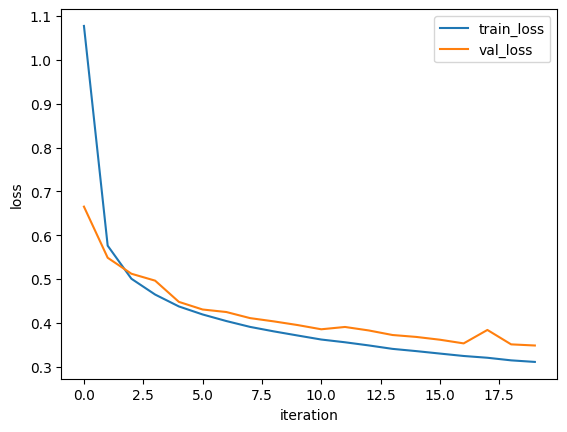

In [69]:
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [83]:
#케라스로 합성곱 신경망 만들기
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense #Flatten이 펼치는 역할

In [84]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [85]:
conv1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1960)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         196,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,210 (770.35 KB)

 Trainable params: 197,210 (770.35 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [87]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8030 - loss: 0.5952 - val_accuracy: 0.8869 - val_loss: 0.3201
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8906 - loss: 0.3058 - val_accuracy: 0.8994 - val_loss: 0.2862
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9086 - loss: 0.2495 - val_accuracy: 0.9078 - val_loss: 0.2551
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9211 - loss: 0.2198 - val_accuracy: 0.9078 - val_loss: 0.2587
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9286 - loss: 0.1935 - val_accuracy: 0.9171 - val_loss: 0.2380
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9392 - loss: 0.1678 - val_accuracy: 0.9109 - val_loss: 0.2533
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9440 - loss: 0.1542 - val_accuracy: 0.9178 - val_loss: 0.2395
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9512 - loss: 0.1341 -

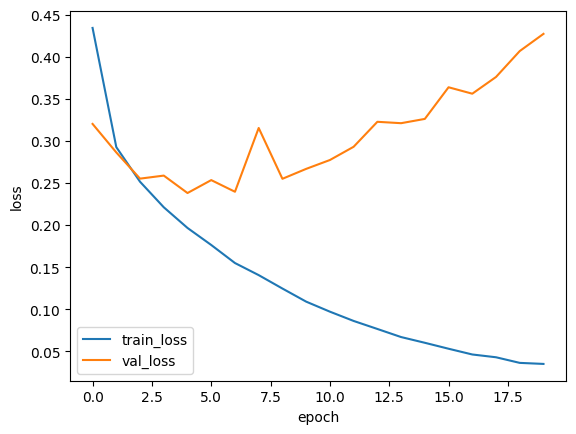

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

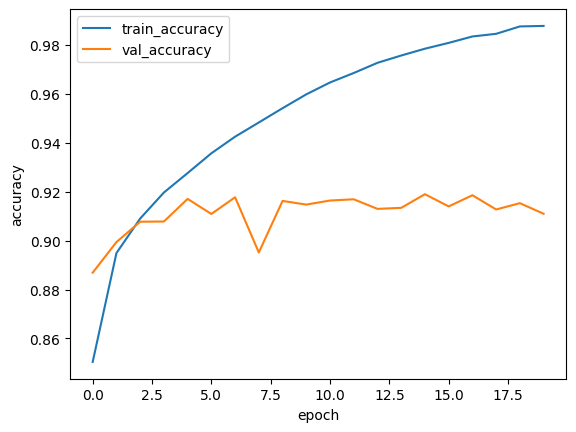

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [90]:
loss, accuracy = conv1.evaluate(x_val, y_val_encoded, verbose=0)

In [91]:
print(accuracy)

0.9110000133514404


In [ ]:
#과대 적합을 줄이는 방법 -> 드롭아웃
#랜덤하게 뽑을 경우 각 데이터가 비슷해야 함
#임의의 뉴런을 꺼버려서 출력값을 줄여버림

#테스트할 때는 드롭아웃 없이 진행
#하지만 그 경우 출력값이 크게 나옴
#줄이지 않고 훈련 과정 (드롭아웃) 중에 출력을 오히려 늘려서 훈련한다

In [92]:
from tensorflow.keras.layers import Dropout

In [93]:
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [94]:
conv2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1960)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1960)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │         196,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,210 (770.35 KB)

 Trainable params: 197,210 (770.35 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [96]:
history = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7654 - loss: 0.6680 - val_accuracy: 0.8792 - val_loss: 0.3489
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8619 - loss: 0.3794 - val_accuracy: 0.8912 - val_loss: 0.3023
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8760 - loss: 0.3367 - val_accuracy: 0.9001 - val_loss: 0.2813
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8865 - loss: 0.3085 - val_accuracy: 0.9016 - val_loss: 0.2698
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8948 - loss: 0.2844 - val_accuracy: 0.9072 - val_loss: 0.2547
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8999 - loss: 0.2712 - val_accuracy: 0.9097 - val_loss: 0.2540
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9084 - loss: 0.2479 - val_accuracy: 0.9107 - val_loss: 0.2425
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9073 - loss: 0.2455 - 

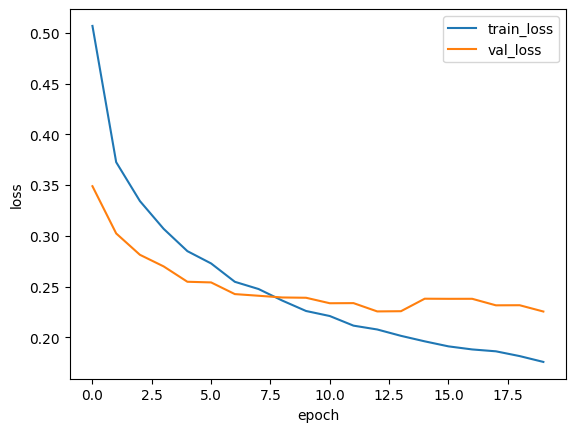

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

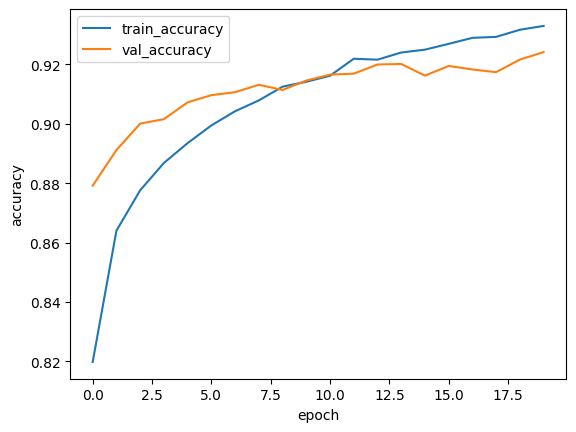

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [99]:
loss, accuracy = conv2.evaluate(x_val, y_val_encoded, verbose=0)

In [100]:
print(accuracy)

0.9241666793823242
